In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.model_selection import train_test_split
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3, random_state=4)

<IPython.core.display.Javascript object>


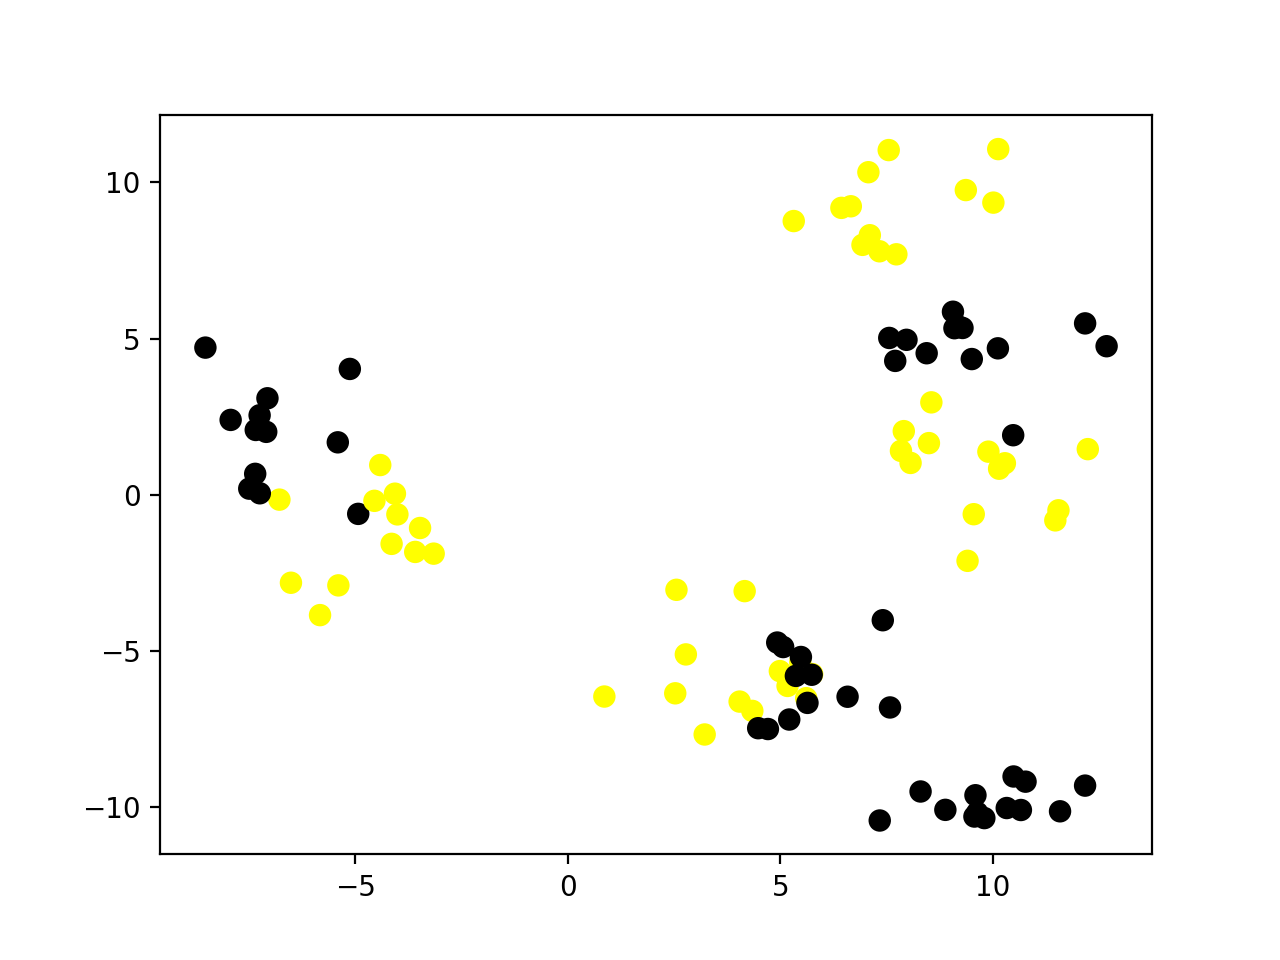

In [2]:
%matplotlib notebook
y_D2 = y_D2 % 2
plt.scatter(X_D2[:, 0], X_D2[:, 1], c = y_D2, marker = 'o', s = 50, cmap = cmap_bold)
# the default SVC kernel ir radiul basis function (RBF)


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


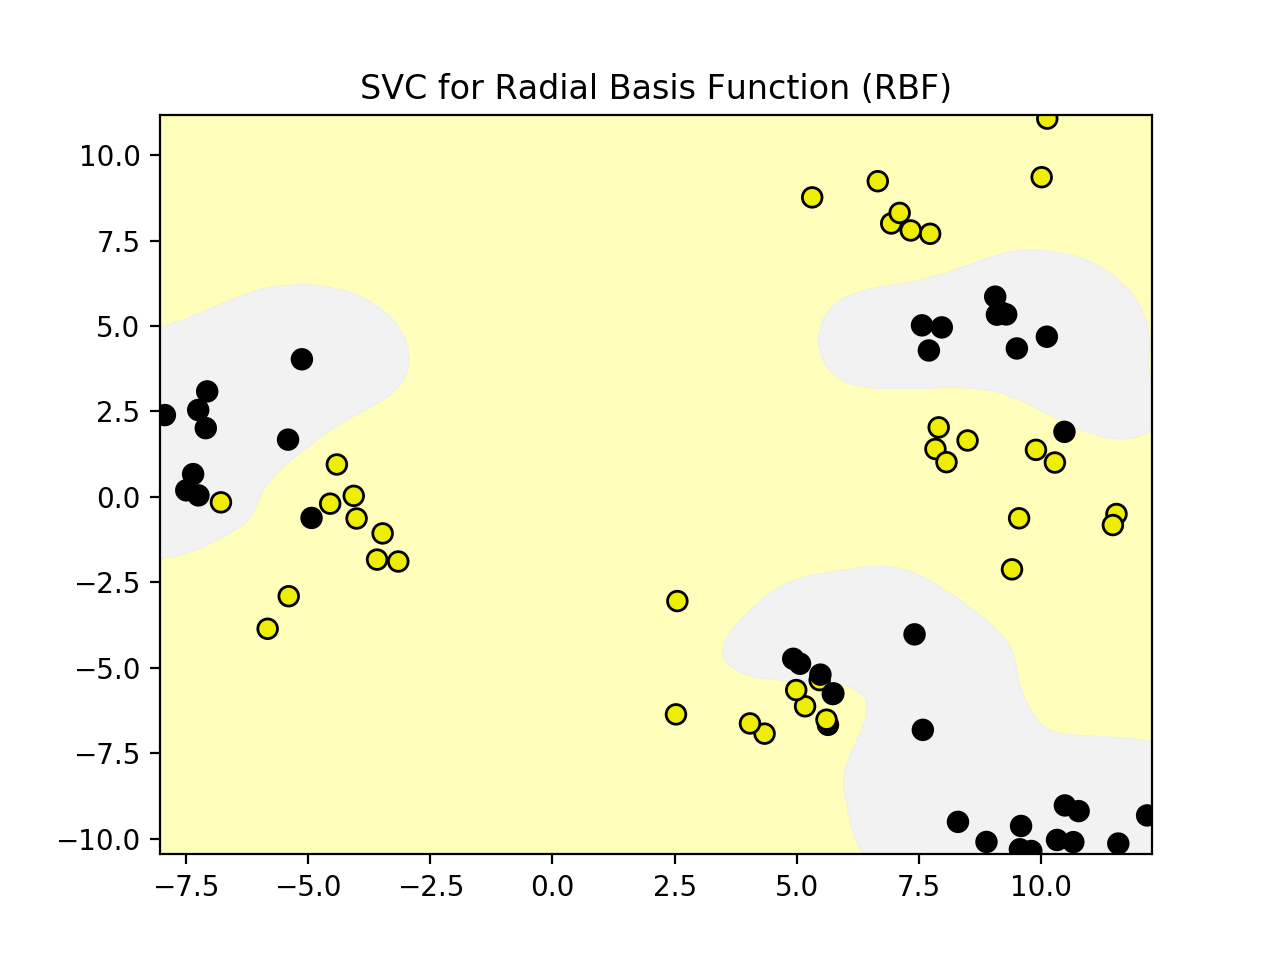

/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


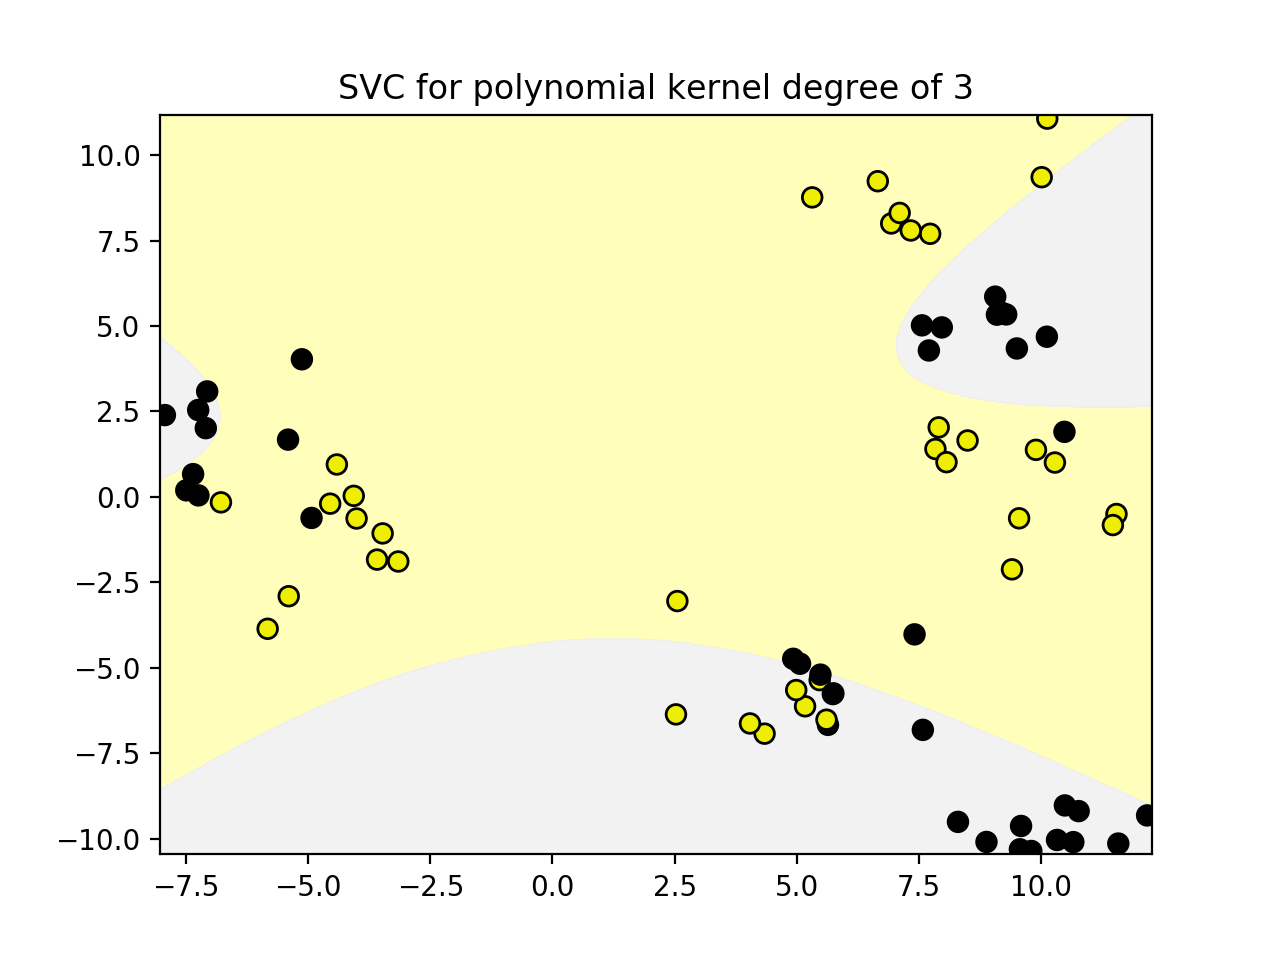

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train), X_train, y_train,
                                  None, None, 'SVC for Radial Basis Function (RBF)')
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3).fit(X_train, y_train), X_train, y_train,
                                 None, None, 'SVC for polynomial kernel degree of 3')

<IPython.core.display.Javascript object>


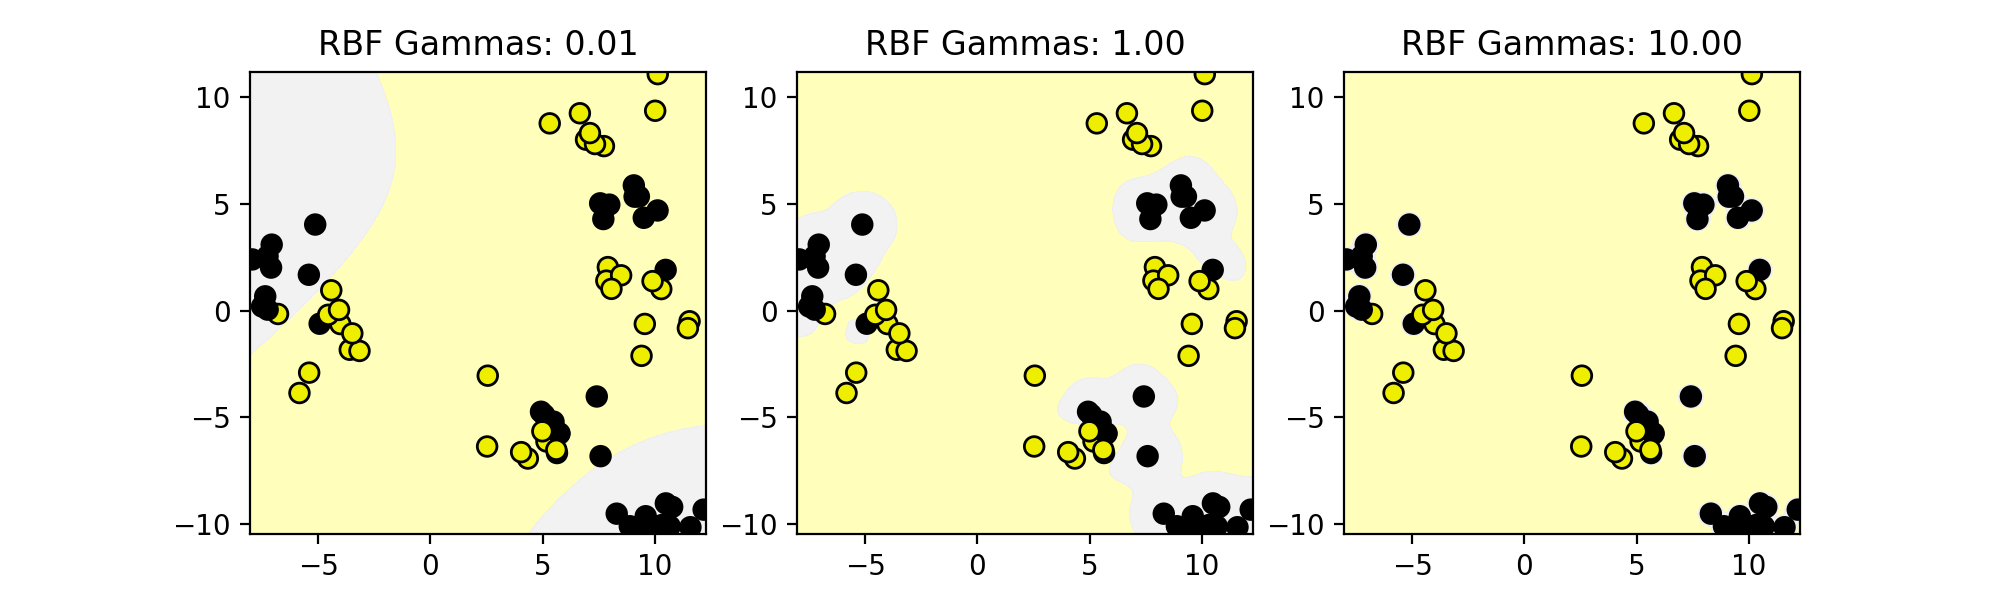

In [4]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1,3, figsize = (10, 3))
for i, subplot in zip([0.01, 1, 10], subaxes):
    plot_class_regions_for_classifier_subplot(SVC(kernel = 'rbf', gamma = i).fit(X_train, y_train),
                                             X_train, y_train, None, None, 'RBF Gammas: {:.2f}'.format
                                              (i), subplot)

# Support Vector classifier with RBF kernel, change C and Gamma parameters

<IPython.core.display.Javascript object>


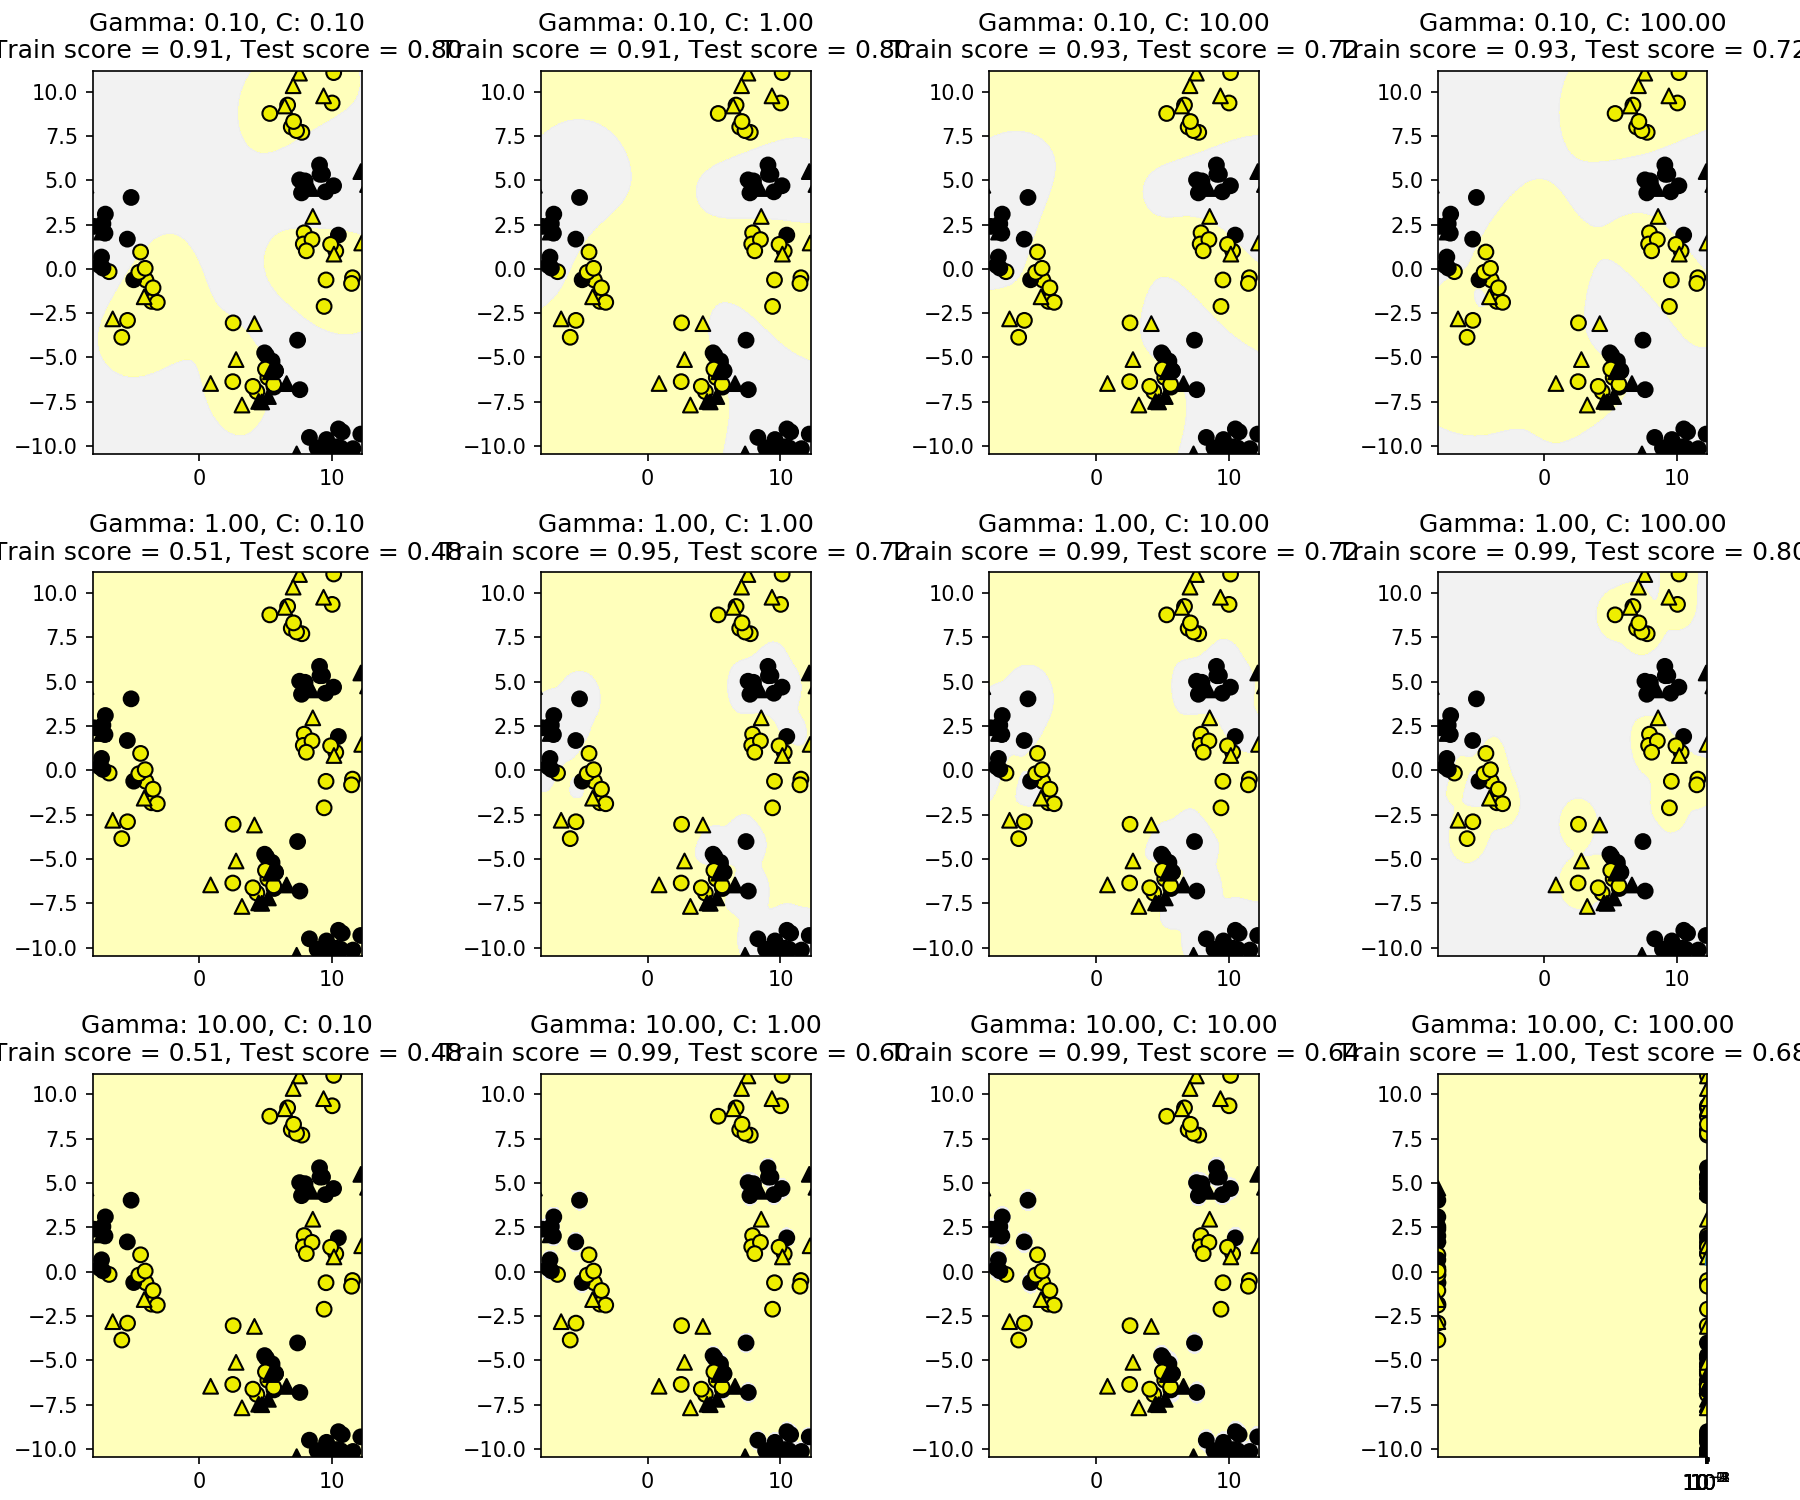

In [5]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3,4, figsize = (12, 10), dpi = 75)

for gamm, this_axis in zip([0.1, 1, 10], subaxes):
    for cc, subplot in zip([0.1, 1, 10, 100], this_axis):
        plot_class_regions_for_classifier_subplot(SVC(kernel = 'rbf', gamma = gamm, C=cc).fit(X_train, y_train),
                                                 X_train, y_train, X_test, y_test, 'Gamma: {:.2f}, C: {:.2f}'.format
                                                 (gamm, cc), subplot)
        

plt.tight_layout(pad = 0.4, w_pad=0.5, h_pad=1.0)

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

(569, 30)

In [24]:
clf = SVC(C = 1.0, gamma='auto').fit(X_train, y_train)
print('SVC score on train data: {:.2f}'.format(clf.score(X_train, y_train)))
print('SVC score on test data: {:.3f}'.format(clf.score(X_test, y_test)))

SVC score on train data: 1.00
SVC score on test data: 0.629


which is not good, now lets normalized the data and see the effect

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

c_list = [0.001, 0.1, 1, 10]
gamma_list = [0.001, 0.1, 1, 10]
for i in c_list:
    for j in gamma_list:
        clf = SVC(C = i, gamma=j).fit(X_train_scaled, y_train)
        print('SVC score on train data: {:.2f}, with C = {:.3f} and gamma = {:.3f}'.format(clf.score(X_train_scaled, y_train), i, j))
        print('SVC score on test data: {:.2f}, with C = {:.3f} and gamma = {:.3f}'.
              format(clf.score(X_test_scaled, y_test), i, j))

SVC score on train data: 0.63, with C = 0.001 and gamma = 0.001
SVC score on test data: 0.63, with C = 0.001 and gamma = 0.001
SVC score on train data: 0.63, with C = 0.001 and gamma = 0.100
SVC score on test data: 0.63, with C = 0.001 and gamma = 0.100
SVC score on train data: 0.63, with C = 0.001 and gamma = 1.000
SVC score on test data: 0.63, with C = 0.001 and gamma = 1.000
SVC score on train data: 0.63, with C = 0.001 and gamma = 10.000
SVC score on test data: 0.63, with C = 0.001 and gamma = 10.000
SVC score on train data: 0.63, with C = 0.100 and gamma = 0.001
SVC score on test data: 0.63, with C = 0.100 and gamma = 0.001
SVC score on train data: 0.91, with C = 0.100 and gamma = 0.100
SVC score on test data: 0.95, with C = 0.100 and gamma = 0.100
SVC score on train data: 0.95, with C = 0.100 and gamma = 1.000
SVC score on test data: 0.92, with C = 0.100 and gamma = 1.000
SVC score on train data: 0.67, with C = 0.100 and gamma = 10.000
SVC score on test data: 0.63, with C = 0.100

# Cross Validation Score

Test CVS with k-NN classifier

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

fruits = pd.read_table('fruit_data_with_colors.txt')
fruits_features = ['mass', 'width', 'height', 'color_score']
fruits_label = ['fruit_label']
X_fruits = fruits[fruits_features]
y_fruits = fruits[fruits_label]
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

clf = KNeighborsClassifier(n_neighbors=5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_score = cross_val_score(clf, X, y, cv = 4).round(3) # cv = 3 defines the cross validate fold
print('average of cross validate score is: {:.2f}'.format(cv_score.mean()))

average of cross validate score is: 0.78


# Validation Curve

In [87]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC # Support Vector Classifier
import numpy as np


param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name= 'gamma', param_range=param_range, cv = 4)
print('gamma_values: \n', param_range, '\n trainscore: \n', train_scores)
print('gamma_values: \n', param_range, '\n testscore: \n', test_scores, '\n average \n', test_scores.mean(axis = 1))

gamma_values: 
 [1.e-03 1.e-01 1.e+01 1.e+03] 
 trainscore: 
 [[0.46511628 0.40909091 0.40909091 0.41304348]
 [0.81395349 0.79545455 0.75       0.73913043]
 [0.90697674 0.90909091 0.86363636 0.84782609]
 [0.97674419 1.         1.         0.97826087]]
gamma_values: 
 [1.e-03 1.e-01 1.e+01 1.e+03] 
 testscore: 
 [[0.5        0.33333333 0.33333333 0.30769231]
 [0.875      0.66666667 0.66666667 0.76923077]
 [0.375      0.6        0.73333333 0.84615385]
 [0.3125     0.33333333 0.33333333 0.30769231]] 
 average 
 [0.36858974 0.74439103 0.63862179 0.32171474]


<IPython.core.display.Javascript object>


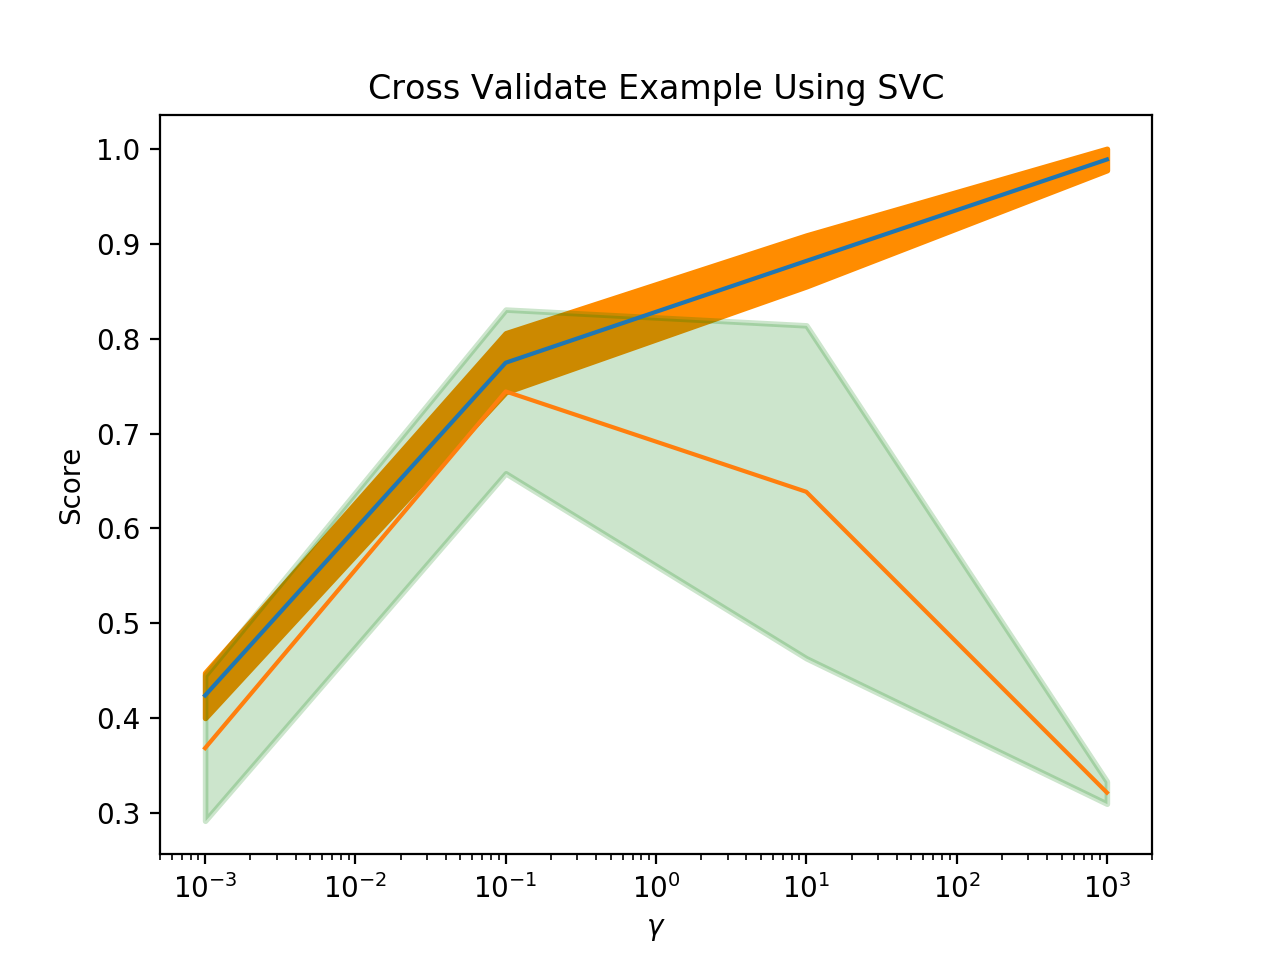

Text(0.5, 1.0, 'Cross Validate Example Using SVC')

In [102]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.semilogx(param_range, train_scores.mean(axis = 1))
plt.fill_between(param_range, train_scores.mean(axis = 1) + train_scores.std(axis = 1), 
                train_scores.mean(axis = 1) - train_scores.std(axis = 1), color='darkorange', lw=2)

plt.semilogx(param_range, test_scores.mean(axis = 1))
plt.fill_between(param_range, test_scores.mean(axis = 1) + test_scores.std(axis = 1), 
                test_scores.mean(axis = 1) - test_scores.std(axis = 1), color='green', lw=2, alpha = 0.2)
plt.xlabel(r'$\gamma$')
plt.ylabel('Score')
plt.title('Cross Validate Example Using SVC')